In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('shipping.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


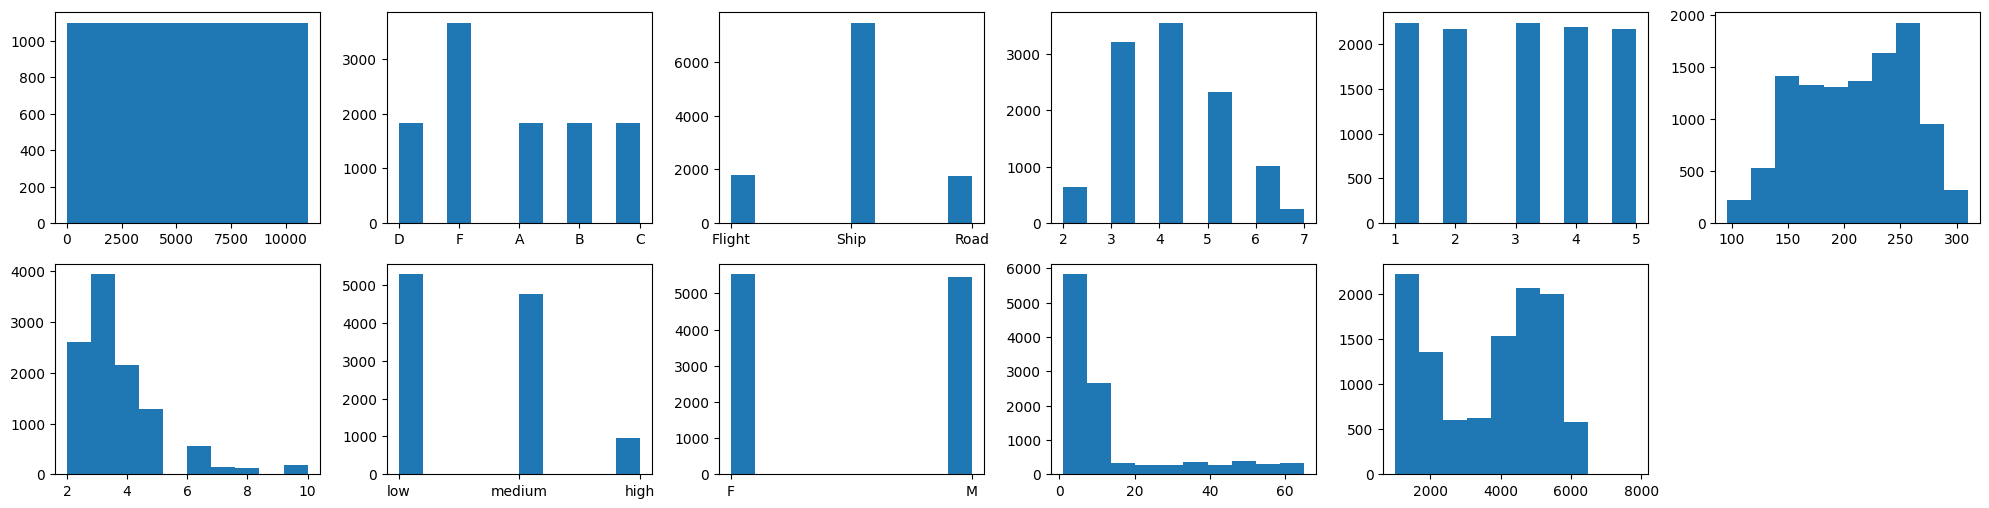

In [70]:
plt.figure(figsize = (20,15))
plotnumber = 1

for i in df.columns:
  if plotnumber <=11:
    plt.subplot(6,6,plotnumber)
    plt.hist(df[i])
  plotnumber +=1
plt.tight_layout()
plt.show()

In [71]:
X = df.drop('Reached.on.Time_Y.N',axis =1)
Y = df['Reached.on.Time_Y.N']

In [72]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
for i in X.columns:
  X[i] = lbl.fit_transform(X[i])

<Axes: >

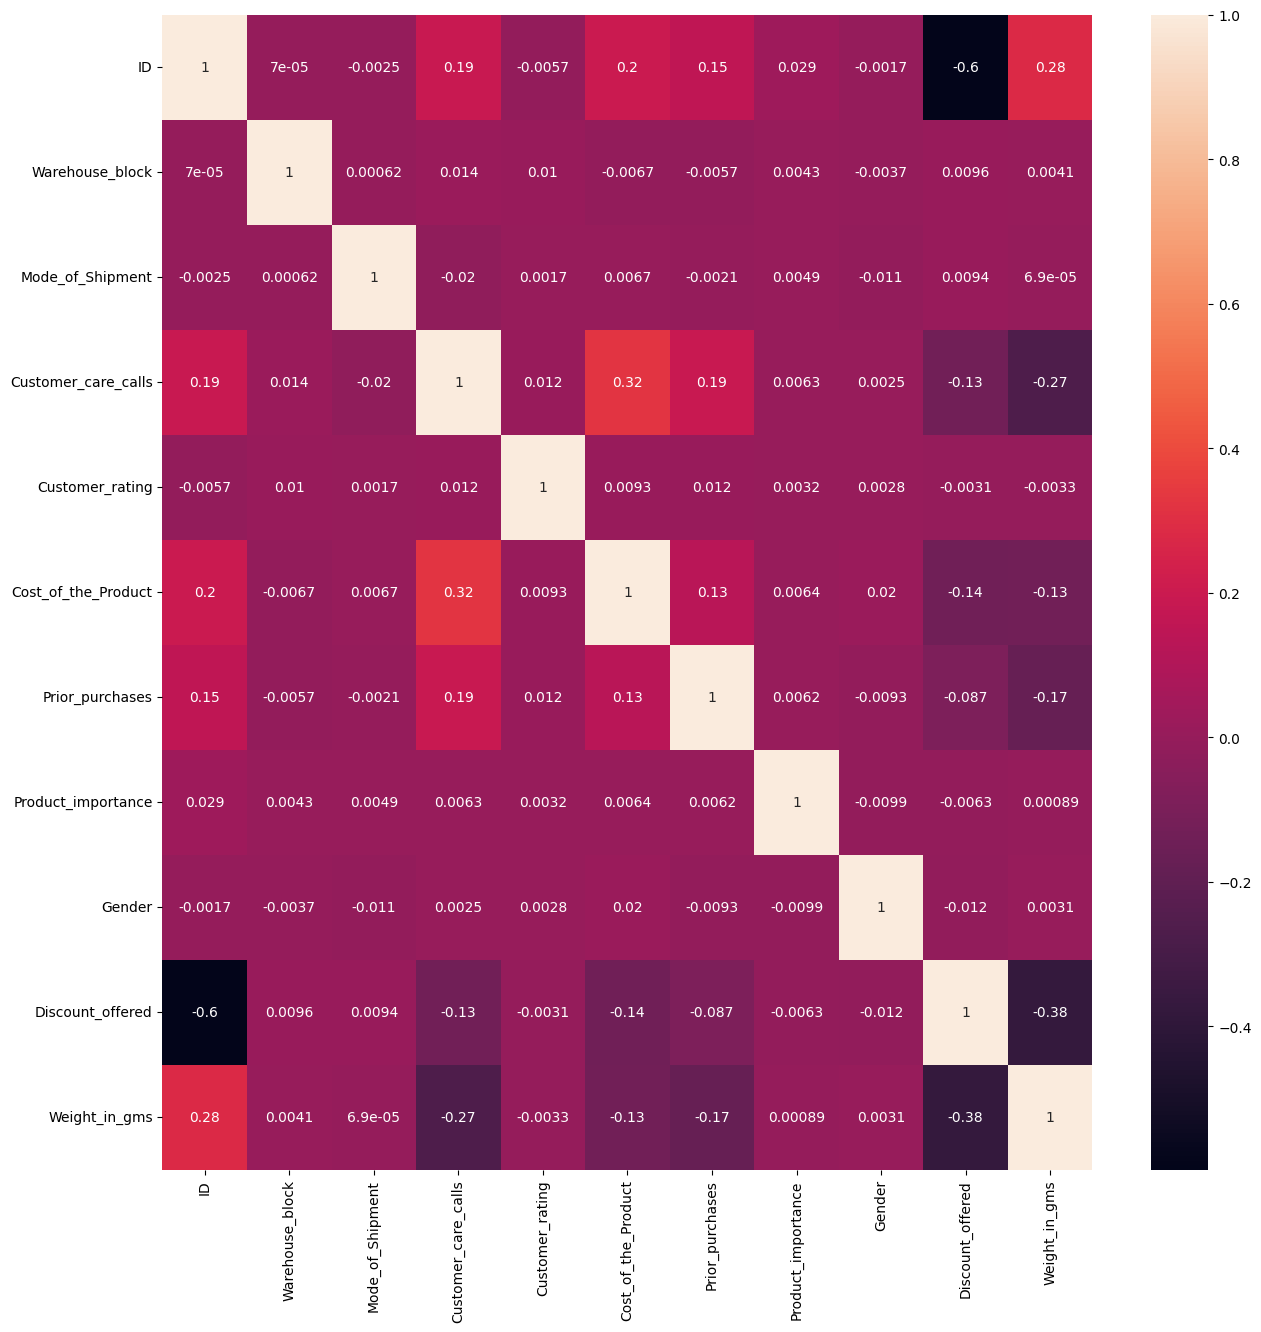

In [73]:
plt.figure(figsize = (15,15))
crr = X.corr()
sns.heatmap(crr,annot = True)

In [74]:
X = X.drop(['Customer_care_calls','Prior_purchases','Gender'],axis =1)

In [75]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(X,Y,random_state = 0 ,test_size = .25)

In [76]:
from sklearn.preprocessing import StandardScaler
strd = StandardScaler()
strd.fit_transform(x_train)

array([[ 1.27592912, -0.89870496,  0.6374519 , ...,  1.03791957,
        -0.40249061,  0.80387555],
       [-1.14728301, -1.56966316,  0.6374519 , ...,  1.03791957,
         2.70477616, -1.40003568],
       [-1.19288531,  1.11416965,  0.6374519 , ...,  1.03791957,
         2.09550817, -0.07302713],
       ...,
       [ 1.37279471,  1.11416965, -0.68573399, ...,  1.03791957,
        -0.6461978 ,  0.51371802],
       [ 1.67282642,  1.11416965, -0.68573399, ...,  1.03791957,
        -0.7071246 , -1.08174653],
       [-0.86423422, -1.56966316, -0.68573399, ..., -0.54613196,
         0.20677739, -0.07463465]])

In [77]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf')
clf.fit(x_train,y_train)

SVC()

In [78]:
y_p  = clf.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_p,y_test)

0.6861818181818182